In [71]:
import matplotlib.pyplot as plt

import numpy as np

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import Resize, ToPILImage, ToTensor


from datasets import load_dataset, load_from_disk
import os 

import random



torch.manual_seed(0);

## Karpathy Rules
- Fix random seed
- Cut out bells and whistles like data augmentation
- Very loss at initalisation 
- Initialise the network well 
- Have a Human baseline, e.g: Accuracy
- Overfit a single batch of data
- Verify decreasing training loss

# The Data

In [49]:
downloaded = os.path.exists('../data/tiny_imagenet/')
if not downloaded:
    tiny_imagenet = load_dataset('Maysee/tiny-imagenet', split='train')
    tiny_imagenet.save_to_disk('../data/tiny_imagenet/')
else:
    tiny_imagenet_load = load_from_disk('../data/tiny_imagenet/')

In [95]:
batch_size = 64
tiny_imagenet.set_format(type='torch', columns=['image', 'label'])
train_dataloader = DataLoader(tiny_imagenet.with_format("torch"), batch_size=batch_size)

for batch in train_dataloader:
    X = batch['image']
    y = batch['label']
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 64, 64, 3])
Shape of y: torch.Size([64]) torch.int64


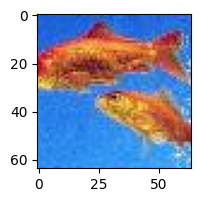

In [109]:

img = batch['image'][random.randint(0, 63)].permute(2, 0, 1)


plt.figure(figsize=(2, 2))  # size is in inches
plt.imshow(img.permute(1, 2, 0), cmap="gray")
plt.show()

# The Network

In [114]:
device = "cpu"

class AlexNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_stack = nn.Sequential(
            nn.Conv2d(in_channels = 1, out_channels=4, kernel_size=5, stride=1, padding=1),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.ReLU(),
            nn.Conv2d(in_channels = 1, out_channels=4, kernel_size=5, stride=1, padding=1),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.ReLU(),
            nn.Conv2d(in_channels = 1, out_channels=4, kernel_size=5, stride=1, padding=1),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.ReLU(),
            nn.Conv2d(in_channels = 1, out_channels=4, kernel_size=5, stride=1, padding=1),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.ReLU(),
            nn.Conv2d(in_channels = 1, out_channels=4, kernel_size=5, stride=1, padding=1),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.ReLU(),
        )
        self.fc_layer = nn.Sequential(
            nn.Linear(2048, 2048), # Number of pixels, number of outputs. 
            nn.ReLU(),
            nn.Linear(2048, 2048), # Number of pixels, number of outputs. 
            nn.ReLU(),
            nn.Softmax(dim=200),
        )
        self.flatten = nn.Flatten()

    def forward(self, x):
        return

model = AlexNet().to(device)
print(model)

AlexNet(
  (conv_stack): Sequential(
    (0): Conv2d(1, 4, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ReLU()
    (3): Conv2d(1, 4, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): ReLU()
    (6): Conv2d(1, 4, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): ReLU()
    (9): Conv2d(1, 4, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): ReLU()
    (12): Conv2d(1, 4, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): ReLU()
  )
  (fc_layer): Sequential(
    (0): Linear(in_features=2048, out_features=2048, bias=True)